# ECS 171 Project - Detecting Phishing Websites
# label of 1 means not phishing, label of 0 means phishing

In [2]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('phishing_url_website.csv')
df.head(n=20)

,URL,Domain,TLD,URLSimilarityIndex,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,Title,DomainTitleMatchScore,URLTitleMatchScore,IsResponsive,HasDescription,HasSocialNet,HasSubmitButton,HasCopyrightInfo,NoOfImage,NoOfJS,NoOfSelfRef,label
0,https://www.southbankmosaics.com,www.southbankmosaics.com,com,100.000000,1,0.032,1,558,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...,0.000000,0.000000,1,0,0,1,1,34,28,119,1
1,https://www.uni-mainz.de,www.uni-mainz.de,de,100.000000,2,0.087,1,618,johannes gutenberg-universitÃ¤t mainz,55.555556,55.555556,0,0,1,1,1,50,8,39,1
2,https://www.voicefmradio.co.uk,www.voicefmradio.co.uk,uk,100.000000,2,0.069,1,467,voice fm southampton,46.666667,46.666667,1,1,0,1,1,10,7,42,1
3,https://www.globalreporting.org,www.globalreporting.org,org,100.000000,1,0.033,1,1210,gri - home,0.000000,0.000000,1,1,1,0,1,35,11,86,1
4,https://www.nerdscandy.com,www.nerdscandy.com,com,100.000000,1,0.040,1,514,nerds candy,100.000000,100.000000,1,1,1,1,1,24,22,36,1
5,https://www.hyderabadonline.in,www.hyderabadonline.in,in,100.000000,1,0.034,1,2371,hyderabadonline - business listing in hyderaba...,100.000000,100.000000,1,1,1,1,1,71,9,40,1
6,https://www.aap.org,www.aap.org,org,100.000000,1,0.056,1,2730,home,0.000000,0.000000,1,1,1,0,1,10,12,173,1
7,https://www.religionenlibertad.com,www.religionenlibertad.com,com,100.000000,1,0.030,1,2616,religiÃ³n en libertad | noticias de religiÃ³n,55.555556,55.555556,1,1,1,1,1,80,10,376,1
8,http://www.teramill.com,www.teramill.com,com,82.644628,1,0.045,0,2,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0
9,https://www.aoh61.com,www.aoh61.com,com,100.000000,1,0.050,1,5966,0,0.000000,0.000000,1,0,1,0,0,16,7,4,1


In [30]:
# Equalizing the number of samples for each class
count = df['label'].value_counts()

n = count[0]

df_0 = df[df['label'] == 0]
df_1 = df[df['label'] == 1]
df_0 = df_0.sample(n=n, random_state=42, replace=False)
df_1 = df_1.sample(n=n, random_state=42, replace=False)

df = pd.concat([df_0, df_1])

In [31]:
# Convert strings to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_df = df.apply(le.fit_transform)

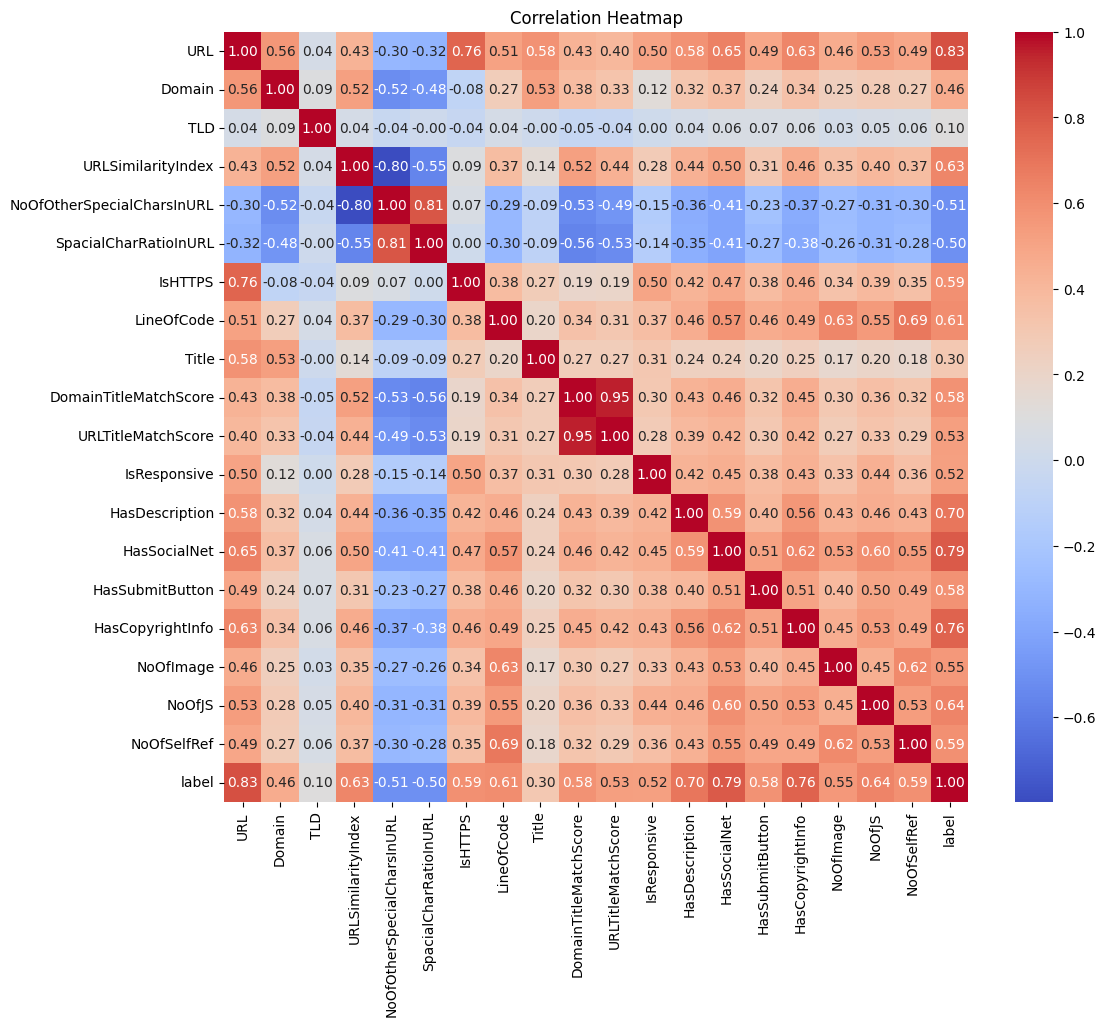

In [32]:
# Plot a correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

X = encoded_df.drop(['label', 'URLSimilarityIndex', 'IsResponsive', 'URLTitleMatchScore', 'HasSubmitButton', 'Title', 'TLD', 'SpacialCharRatioInURL'], axis=1)
y = encoded_df['label']

/home/rasooly/Projects/ECS171Project/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Accuracy: 0.999826479264272
Logistic Regression Accuracy: 0.9971889640812077
Random Forest Confusion Matrix:
[[14556     5]
 [    0 14254]]
Logistic Regression Confusion Matrix:
[[14511    50]
 [   31 14223]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14561
           1       1.00      1.00      1.00     14254

    accuracy                           1.00     28815
   macro avg       1.00      1.00      1.00     28815
weighted avg       1.00      1.00      1.00     28815

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14561
           1       1.00      1.00      1.00     14254

    accuracy                           1.00     28815
   macro avg       1.00      1.00      1.00     28815
weighted avg       1.00      1.00      1.00     28815



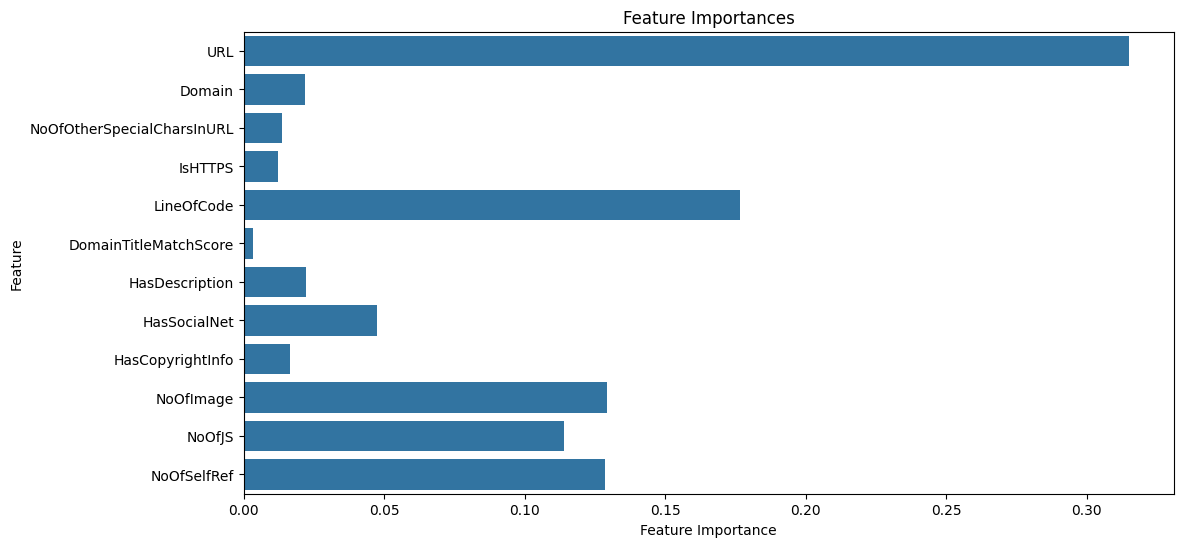

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Train a Logistic Regression Classifier
lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)


# Make predictions
y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)

# Calculate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Logistic Regression Accuracy: {accuracy_lr}')

# Print the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_lr = confusion_matrix(y_test, y_pred_lr)

print('Random Forest Confusion Matrix:')
print(cm_rf)
print('Logistic Regression Confusion Matrix:')
print(cm_lr)

# Print the classification report
cr_rf = classification_report(y_test, y_pred_rf)
cr_lr = classification_report(y_test, y_pred_lr)

print('Random Forest Classification Report:')
print(cr_rf)
print('Logistic Regression Classification Report:')
print(cr_lr)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=rf.feature_importances_, y=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


In [58]:
# Save the models
import joblib

joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(lr, 'logistic_regression_model.pkl')
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(X.columns, 'features.pkl')

['features.pkl']

In [59]:
# Load the models
rf = joblib.load('random_forest_model.pkl')
lr = joblib.load('logistic_regression_model.pkl')
le = joblib.load('label_encoder.pkl')
features = joblib.load('features.pkl')

In [ ]:
# # We know it is after clean. Proof just in case.
# # check outliers
# def check_outliers(input_df):
#     output_df = input_df.copy()
#     q1 = output_df[filtered_featuers].quantile(0.25)
#     q3 = output_df[filtered_featuers].quantile(0.75)
#     iqr = q3 - q1
#     bottom = q1 + 1.5 * iqr
#     up = q3 + 1.5 * iqr
#     outliers = output_df[(output_df[filtered_featuers] < bottom) | (output_df[filtered_featuers] > up)].dropna(how="all")
#     return outliers

# # check the N/a
# print(df.isnull().sum())
# print(df.isnull().sum(axis = 1))
# none_judge = df.isnull().values.sum() != 0
# if(none_judge == False):
#     print("There is no None data.")

# # check the outliers
# outliers = check_outliers(df)
# outliers_judge = outliers.empty
# if(outliers_judge):
#     print(f"There is no outliers.")